# <span class="bg-primary">16. DEV - ENTRAINER MODELE PREDICTIF LINEAIRE</span>

# <span class="bg-info">TP - COMPARER LASSO et REGRESSION RIDGE</span>

# <span class="bg-warning">REGRESSION RIDGE</span>

In [84]:
# Chemin des sources
import os
os.chdir('C:/Users/PC Maison/7-OPENCLASSROOM/OC-COURS-16-ENTRAINER_MODELE_PREDICTIF_LINEAIRE')

In [85]:
# Chargement des librairies
import pandas as pd

In [86]:
# Chargement du jeu de données
raw_data = pd.read_csv('cancer-prostate.txt', delimiter='\t')

In [87]:
raw_data.head()

,col,lcavol,lweight,age,lbph,svi,lcp,gleason,pgg45,lpsa,train
0,1,-0.579818,2.769459,50,-1.386294,0,-1.386294,6,0,-0.430783,T
1,2,-0.994252,3.319626,58,-1.386294,0,-1.386294,6,0,-0.162519,T
2,3,-0.510826,2.691243,74,-1.386294,0,-1.386294,7,20,-0.162519,T
3,4,-1.203973,3.282789,58,-1.386294,0,-1.386294,6,0,-0.162519,T
4,5,0.751416,3.432373,62,-1.386294,0,-1.386294,6,0,0.371564,T


In [89]:
# FEATURES
X = raw_data.iloc[:, 1:-3]

In [90]:
# TARGET = lpsa
y = raw_data.iloc[:, -2]

In [91]:
# Standardisation des features
from sklearn import preprocessing

# Entainement du scaler sur X
std_scale = preprocessing.StandardScaler().fit(X)
# application du scaler sur X
X_scale = std_scale.transform(X)

In [92]:
# Découpage du jeu de données en Train set et Test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_scale, y, test_size=0.25)

In [93]:
X_train.shape

(72, 7)

In [94]:
X_test.shape

(25, 7)

In [95]:
# Régression linéaire classique : baseline
from sklearn import linear_model

# création du modèle de régression linéaire
lr = linear_model.LinearRegression()
# entrainement du modèle sur le Train set
lr.fit(X_train, y_train)

LinearRegression()

In [96]:
# calcule des performances de cette régression linéaire
import numpy as np

# Evaluation du modèle
# moindre carré ==> erreur quadratique
# On récupère l'erreur de norme 2 sur le jeu de données test comme baseline
baseline_error = np.mean((lr.predict(X_test) - y_test) ** 2)
print(f'{baseline_error = }')
# on veut améliorer cette erreur avec ridge ou lasso

baseline_error = 0.5414380507477223


In [97]:
# régression RIDGE : plusieurs paramètres alpha a tester pour trouver le 
# coefficient de régression adapté = coef alpha
n_alphas = 200
alphas = np.logspace(-5, 5, n_alphas)

# test de toutes les régressions ridge avec les différentes valeurs de 
# l'hyperparamètre alpha

from sklearn.linear_model import Ridge

# Création du modèle de régression ridge
ridge = linear_model.Ridge()

# on récupère les poids des coefficients
coefs = []
# on récupère l'erreur quadratique
errors = []
err = []

# boucle sur tous les aplha pour voir poids des coef et l'erreur quadaratique
for a in alphas:
    # application du paramètre alpha au ridge
    ridge.set_params(alpha=a)
    # entrainement du modèle sur le Train set
    ridge.fit(X_train, y_train)
    # stockage du poids du coef dans liste coef pour ce paramètre alpha
    coefs.append(ridge.coef_)
    # stockage des erreurs quadratiques pour ce paramètre alpha
    # errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test) ** 2)])
    errors.append([baseline_error, np.mean((ridge.predict(X_test) - y_test) ** 2)])
    err.append(np.mean((ridge.predict(X_test) - y_test) ** 2))

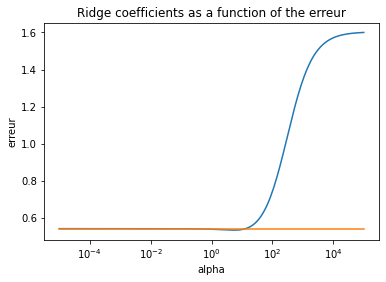

In [108]:
# Visualisation de l'évalution de l'erreur en fonction des paramètres alpha et 
# les comparer à notre baseline
import matplotlib.pyplot as plt

ax = plt.gca()

ax.plot(alphas, err)
ax.plot([10**-5, 10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('erreur')
plt.title('Ridge coefficients as a function of the erreur')
plt.axis('tight')
plt.show()
# la régularisation diminue l'erreur sur le jeu de données tests
# vers alpha=10, le minimum semble se trouver pour la régression ridge

# PARAMETRE DE REGULARISATION

In [109]:
min(errors)

[0.5414380507477223, 0.5335641503082388]

In [99]:
np.argmin(err)

114

In [114]:
# paramètre de régularisation
alphas[np.argmin(err)]

5.35356667741073

In [115]:
err[np.argmin(err)]

0.5335641503082388

# CHEMIN DE REGULARISATION

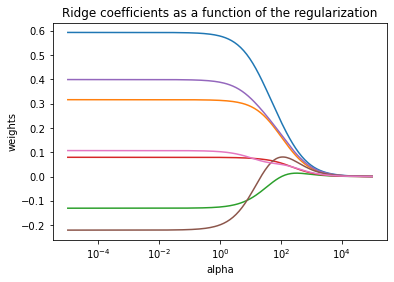

In [101]:
# Visualisation de la valeur des différents poids en fonction des coefficients
import matplotlib.pyplot as plt

ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()
# les différents paramètre 10puissance 2 paramètres pas annulés
# et regroupement des données pour courbes rose et rouge
# la valeur de alpha diminue les poids de toutes les paramètres de régression

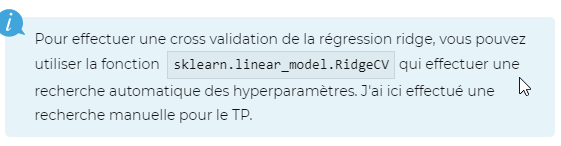

# <span class="bg-warning">LASSO</span>    

In [116]:
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)

# création modèle lasso
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append(np.mean((lasso.predict(X_test) - y_test) ** 2))

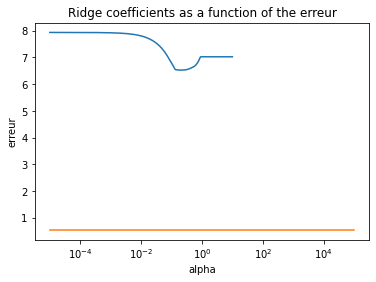

In [119]:
# Visualisation de l'évalution de l'erreur en fonction des paramètres alpha et 
# les comparer à notre baseline
import matplotlib.pyplot as plt

ax = plt.gca()

ax.plot(alphas, errors)
ax.plot([10**-5, 10**5], [baseline_error, baseline_error])
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('erreur')
plt.title('Ridge coefficients as a function of the erreur')
plt.axis('tight')
plt.show()
#

In [120]:
n_alphas = 300
alphas = np.logspace(-5, 1, n_alphas)
lasso = linear_model.Lasso(fit_intercept=False)

coefs = []
errors = []
for a in alphas:
    lasso.set_params(alpha=a)
    lasso.fit(X_train, y_train)
    coefs.append(lasso.coef_)
    errors.append([baseline_error, np.mean((lasso.predict(X_test) - y_test) ** 2)])

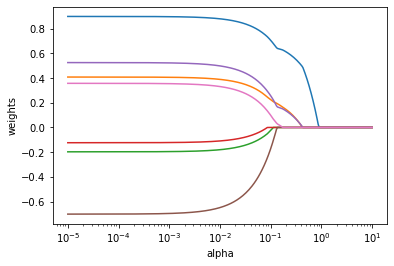

In [121]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.axis('tight')
plt.show()

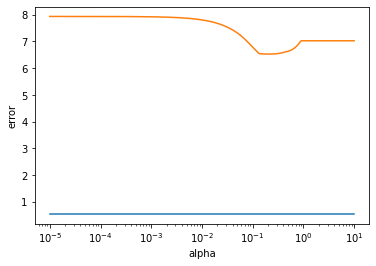

In [122]:
ax = plt.gca()

ax.plot(alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.axis('tight')
plt.show()

In [123]:
min(errors)

[0.5414380507477223, 6.528533721491726]

In [125]:
alphas[np.argmin(err)]

0.001939212572065831

# <span class="bg-info">REGRESSION LOGISTIQUE</span>

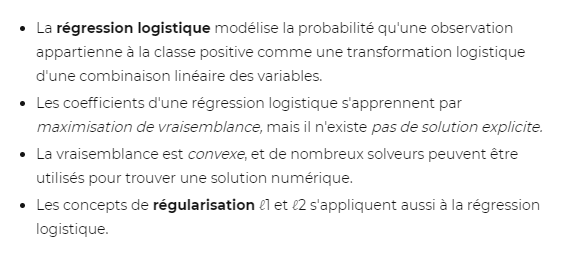

# <span class="bg-info">TP - REGRESION LOGISTIQUE ET SVM LINEAIRE </span>

In [127]:
# Chemin des sources
import os
os.chdir('C:/Users/PC Maison/7-OPENCLASSROOM/OC-COURS-16-ENTRAINER_MODELE_PREDICTIF_LINEAIRE')

In [128]:
# Chargement des librairies
import pandas as pd

In [129]:
# Chargement du jeu de données
raw_data = pd.read_csv('mushrooms.csv')

In [130]:
raw_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [131]:
# transformer les lettres en chiffres
from sklearn.preprocessing import LabelEncoder
labelencoder=LabelEncoder()
for col in raw_data.columns:
    raw_data[col] = labelencoder.fit_transform(raw_data[col])

raw_data.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [136]:
# features
X = raw_data.iloc[:, 1:23]
X.shape

(8124, 22)

In [137]:
# target = première colonne : classe des champignons
y = raw_data.iloc[:, 0]
y.shape

(8124,)

In [139]:
# découpage du jeu de données en train set et test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

# <span class="bg-warning">REGRESSION LOGISTIQUE CLASSIQUE</span>

In [141]:
# modèle de régression linéaire
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc

# création du modèle de régression logiqtique
lr = LogisticRegression(solver = 'liblinear')

# entrainement du modèle sur le train set
lr.fit(X_train,y_train)

# On récupère la prédiction de la valeur positive empoisonnée
y_prob = lr.predict_proba(X_test)[:,1] 

# On créé un vecteur de prédiction à partir du vecteur de probabilités
y_pred = np.where(y_prob > 0.5, 1, 0) 


# courbe ROC
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9812886520119265


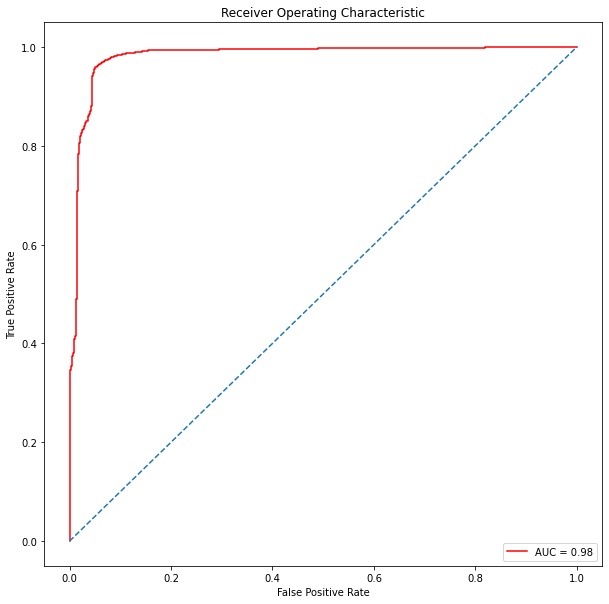

In [142]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
# faux positif en fonction des vrais positif
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--') #classifier aléatoire
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [149]:
# aire sous la courbe de notre régression logistique = baseline à comparer
from sklearn.metrics import roc_curve, auc
print(auc(false_positive_rate, true_positive_rate))

0.9812886520119265


# <span class="bg-warning">REGRESSION LOGISTIQUE BEST HYPERPARAM</span>

# TROUVER LE MEILLEUR HYPERPARAMETRE : GridSearchCv

In [152]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

lr = LogisticRegression()
params = {'C': np.logspace(-3, 3, 10) , 'penalty':['l1','l2'] }

lr_gs = GridSearchCV(lr, params, cv=10)
lr_gs.fit(X_train, y_train)

print(lr_gs.best_params_)

C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py", line 531, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Outils\lib\site-packages\sklearn\linear_model\_logistic.py", line 1304, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\Outils\lib\site-packages\sklearn\linear_model\_logistic.py", line 442, in _check_solver
    raise ValueError("Solver %s supports only 'l2' or 'none' penalties, "
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\Outils\lib\site-packages\sklearn\model_selection\_validation.py:548: FitFailedWarning: Estimator

C:\Users\Outils\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Outils\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

C:\Users\Outils\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Outils\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

C:\Users\Outils\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Outils\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

C:\Users\Outils\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Outils\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

{'C': 1000.0, 'penalty': 'l2'}


C:\Users\Outils\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Outils\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimiz

In [153]:
print(lr_gs.best_params_)

{'C': 1000.0, 'penalty': 'l2'}


In [170]:
# Evaluation du modèle déjà entrainé avec les meilleurs paramètres
# On récupère la prédiction de la valeur positive
y_prob = lr_gs.predict_proba(X_test)[:,1] 

# On créé un vecteur de prédiction à partir du vecteur de probabilités
y_pred = np.where(y_prob > 0.5, 1, 0) 

# courbe roc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9872310197391478


In [171]:
# régression logistique classique                : 0.9812886520119265
# régression logistique avec meilleur hyperparam : 0.9872310197391478

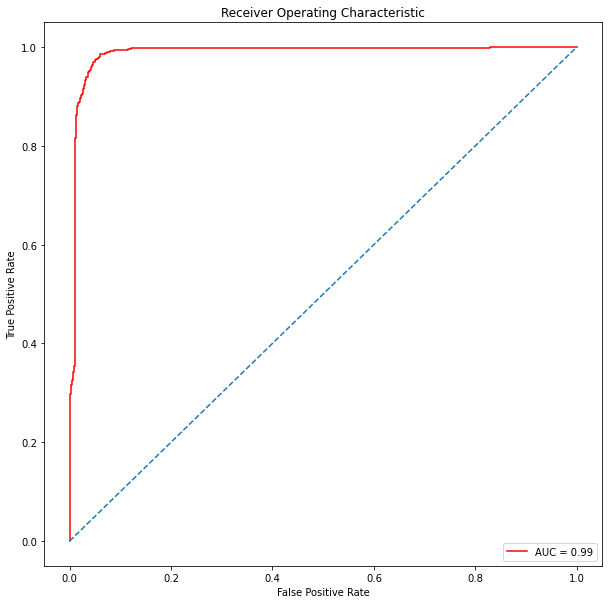

In [172]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
# faux positif en fonction des vrais positif
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--') #classifier aléatoire
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

# <span class="bg-warning">MODELE SVM LINEAIRE</span>

In [159]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc

svm = LinearSVC()

params = { 'C': np.logspace(-3, 3, 10) }

gs_svm = GridSearchCV(svm, params, cv=10)
gs_svm.fit(X_train, y_train)

C:\Users\Outils\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Outils\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Outils\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Outils\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Outils\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to conver

C:\Users\Outils\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Outils\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Outils\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Outils\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\Users\Outils\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to conver

{'C': 2.154434690031882}


C:\Users\Outils\lib\site-packages\sklearn\svm\_base.py:976: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


In [160]:
# meilleur paramètre
print(gs_svm.best_params_)

{'C': 2.154434690031882}


In [173]:
# courbe roc
from sklearn.metrics import roc_curve, auc
y_pred = gs_svm.predict(X_test)
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(false_positive_rate, true_positive_rate)
print(roc_auc)

0.9451599728256473


In [166]:
# régression logistique classique                : 0.9812886520119265
# régression logistique avec meilleur hyperparam : 0.9872310197391478
# SVM                                            : 0.9451599728256473

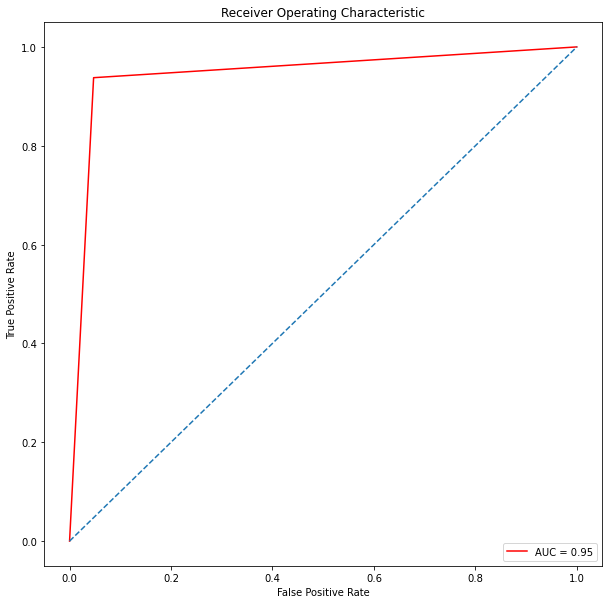

In [174]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('Receiver Operating Characteristic')
# faux positif en fonction des vrais positif
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--') #classifier aléatoire
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()